<a href="https://colab.research.google.com/github/RickyDoan/DL-Tensor-Flow-Prediction/blob/main/TF_Bert_Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import pandas as pd

In [192]:
!pip install tensorflow_text
import tensorflow_text as text
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras

In [193]:
df = pd.read_csv("/content/drive/MyDrive/A Learning Tensor Flow/Bert-Email Spam/spam.csv", encoding='latin-1', usecols=['v1','v2'])
df.head()
print(df.shape)
df.head()

(5572, 2)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [194]:
df.isnull().sum()

,0
v1,0
v2,0


In [195]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(df[['v2']], df['v1'])

In [196]:
y_resampled.value_counts()

,count
v1,
ham,4825
spam,4825


In [197]:
df_ham_sampled = df_ham.sample(df_spam.shape[0])
df_ham_sampled.shape

(747, 2)

In [198]:
df_sample = pd.concat([df_spam, df_ham_sampled], axis=0)
print(df_sample.shape)
df_sample.head()

(1494, 2)


,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [199]:
df_sample['v1'].value_counts()

,count
v1,
spam,747
ham,747


In [200]:
df_sample['v1'] = df_sample['v1'].map({'spam':1,'ham':0})

df_sample = df_sample.rename(columns ={
    'v2':'email',
    'v1': 'spam'
})
df_sample.head()


,spam,email
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [201]:
df_sample['spam'].value_counts()

,count
spam,
1,747
0,747


In [202]:
from sklearn.model_selection import train_test_split

X = df_sample['email']
y = df_sample['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
X_train.head()

,email
3996,Bored housewives! Chat n date now! 0871750.77....
3999,This is the 2nd time we have tried to contact ...
1890,Ok but knackered. Just came home and went to s...
3677,Promotion Number: 8714714 - UR awarded a City ...
5413,Nite nite pocay wocay luv u more than n e thin...


In [204]:
text_input = keras.layers.Input(shape=(), dtype=tf.string)
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
    trainable=False)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

In [205]:
s = keras.layers.Dropout(0.2,name ='dropout')(pooled_output)
s = keras.layers.Dense(64,activation ='relu',name = 'h64')(s)
s = keras.layers.Dense(32,activation ='relu',name ='h34')(s)
s = keras.layers.Dense(8,activation ='relu',name ='h8')(s)
s = keras.layers.Dense(1,activation ='sigmoid',name ='output')(s)

model = keras.Model(text_input,s)

In [206]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [207]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [208]:
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train, epochs=10)

Epoch 1/10
38/38 [==============================] - 13s 51ms/step - loss: 0.5220 - accuracy: 0.7448
Epoch 2/10
38/38 [==============================] - 2s 51ms/step - loss: 0.2905 - accuracy: 0.8762
Epoch 3/10
38/38 [==============================] - 2s 51ms/step - loss: 0.2402 - accuracy: 0.8979
Epoch 4/10
38/38 [==============================] - 2s 50ms/step - loss: 0.2140 - accuracy: 0.9138
Epoch 5/10
38/38 [==============================] - 2s 50ms/step - loss: 0.1858 - accuracy: 0.9356
Epoch 6/10
38/38 [==============================] - 2s 50ms/step - loss: 0.2300 - accuracy: 0.9121
Epoch 7/10
38/38 [==============================] - 2s 50ms/step - loss: 0.2004 - accuracy: 0.9289
Epoch 8/10
38/38 [==============================] - 2s 50ms/step - loss: 0.1648 - accuracy: 0.9439
Epoch 9/10
38/38 [==============================] - 2s 52ms/step - loss: 0.1550 - accuracy: 0.9439
Epoch 10/10
38/38 [==============================] - 2s 51ms/step - loss: 0.1409 - accuracy: 0.9456


In [209]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 46ms/step - loss: 0.1415 - accuracy: 0.9699


[0.14145176112651825, 0.9698996543884277]

In [210]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
report = classification_report(y_test, y_pred)
print(report)

10/10 [==============================] - 1s 45ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       154
           1       0.95      0.99      0.97       145

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



In [211]:
text = "URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"

In [212]:
prediction = model.predict([text])
prediction = np.where(prediction > 0.5, 1, 0)
if prediction[0][0] == 1:
  print("Spam")
else:
  print("Ham")

1/1 [==============================] - 1s 1s/step
Spam


In [213]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [214]:
df['v1'].value_counts()

,count
v1,
ham,4825
spam,747


In [215]:
df['v1'] = df['v1'].map({'spam':1,'ham':0})

df = df.rename(columns ={
    'v2':'email',
    'v1': 'spam'
})
df.head()

,spam,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [216]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(df[['email']], df['spam'])

In [217]:
y_resampled.value_counts()

,count
spam,
0,4825
1,4825


In [218]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [219]:
text_input = keras.layers.Input(shape=(), dtype=tf.string)
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
    trainable=False)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

In [220]:
s = keras.layers.Dropout(0.2,name ='dropout')(pooled_output)
s = keras.layers.Dense(64,activation ='relu',name = 'h64')(s)
s = keras.layers.Dense(32,activation ='relu',name ='h34')(s)
s = keras.layers.Dense(8,activation ='relu',name ='h8')(s)
s = keras.layers.Dense(1,activation ='sigmoid',name ='output')(s)

model2 = keras.Model(text_input,s)

In [221]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [222]:
with tf.device('/device:GPU:0'):
    model2.fit(X_train2, y_train2, epochs=10)

Epoch 1/10
242/242 [==============================] - 21s 51ms/step - loss: 0.4754 - accuracy: 0.8585
Epoch 2/10
242/242 [==============================] - 12s 51ms/step - loss: 0.3539 - accuracy: 0.9403
Epoch 3/10
242/242 [==============================] - 12s 51ms/step - loss: 0.3003 - accuracy: 0.9484
Epoch 4/10
242/242 [==============================] - 12s 51ms/step - loss: 0.2754 - accuracy: 0.9448
Epoch 5/10
242/242 [==============================] - 12s 51ms/step - loss: 0.2457 - accuracy: 0.9506
Epoch 6/10
242/242 [==============================] - 12s 51ms/step - loss: 0.2223 - accuracy: 0.9528
Epoch 7/10
242/242 [==============================] - 12s 51ms/step - loss: 0.2226 - accuracy: 0.9456
Epoch 8/10
242/242 [==============================] - 12s 51ms/step - loss: 0.1887 - accuracy: 0.9588
Epoch 9/10
242/242 [==============================] - 12s 51ms/step - loss: 0.1815 - accuracy: 0.9560
Epoch 10/10
242/242 [==============================] - 12s 51ms/step - loss: 0.178

In [223]:
model2.evaluate(X_test2, y_test2)

61/61 [==============================] - 4s 49ms/step - loss: 0.1422 - accuracy: 0.9710


[0.1421651989221573, 0.9709844589233398]

In [224]:
y_pred2 = model2.predict(X_test2)
y_pred2 = np.where(y_pred2 > 0.5, 1, 0)
report = classification_report(y_test2, y_pred2)
print(report)

61/61 [==============================] - 4s 46ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       985
           1       0.99      0.95      0.97       945

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930



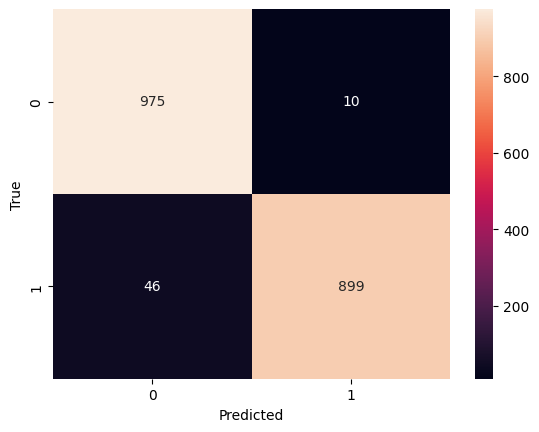

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [226]:
text2 = "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"

In [227]:
prediction2 = model2.predict([text2])
prediction2 = np.where(prediction2 > 0.5, 1, 0)
if prediction2[0][0] == 1:
  print("Spam")
else:
  print("Ham")

1/1 [==============================] - 1s 992ms/step
Spam
